In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv("/content/housing (1).csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,1


In [22]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
df.fillna(df['total_bedrooms'].mean(),inplace=True)

In [24]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

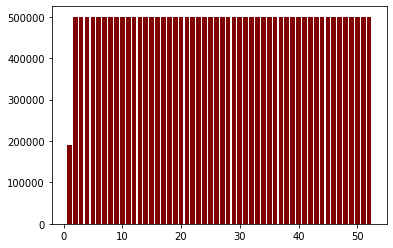

In [71]:
plt.bar(df['housing_median_age'],df['median_house_value'],color='maroon')
plt.show()

In [51]:
x=df.drop(labels='median_house_value',axis=1)
y=df['median_house_value']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gra=GradientBoostingRegressor(n_estimators=200,max_depth=3,random_state=1)

In [54]:
gra.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=200, random_state=1)

In [55]:
y_pred=gra.predict(x_test)

In [56]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
acc

0.7901552306937462

In [57]:
from sklearn.metrics import mean_squared_error as MSE
test_rmse = MSE(y_test,y_pred) ** (1 / 2)
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 53261.98


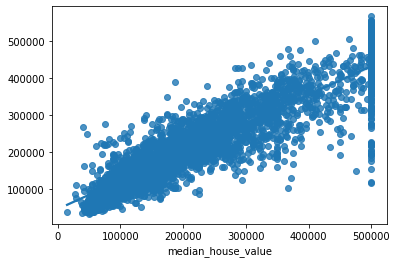

In [72]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred)